In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import leaves_list

In [2]:
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_feat = os.path.join(pth_data, 'features', 'biomart')
pth_out = os.path.join(pth, 'figures', 'preprocessing', 'features')

In [3]:
feat_fn = sorted(glob.glob(os.path.join(pth_feat, '*.csv')))
df = pd.read_csv(os.path.join(pth_data, 'summary.csv'), index_col = 0)
get_name = lambda fn: df.loc[os.path.split(fn)[1].replace('.csv', '')].Name
feat_dict = {get_name(fn) : fn for fn in feat_fn if 'union' not in fn}
for key in feat_dict:
    feat_dict[key] = pd.read_csv(feat_dict[key])

In [4]:
# features pairwise similarities (IoU)
ix, method = feat_dict.keys(), 'complete'
jac = pd.DataFrame(0., index = ix, columns = ix)
for key_i in jac.columns:
    g1 = set(feat_dict[key_i].mmusculus)
    for key_j in jac.columns:
        g2 = set(feat_dict[key_j].mmusculus)
        jac.loc[key_i, key_j] = len(g1 & g2) / len(g1 | g2)
Z = linkage(jac, method = method, optimal_ordering = True)
jac = jac.iloc[leaves_list(Z), leaves_list(Z)].iloc[:-1, 1:]

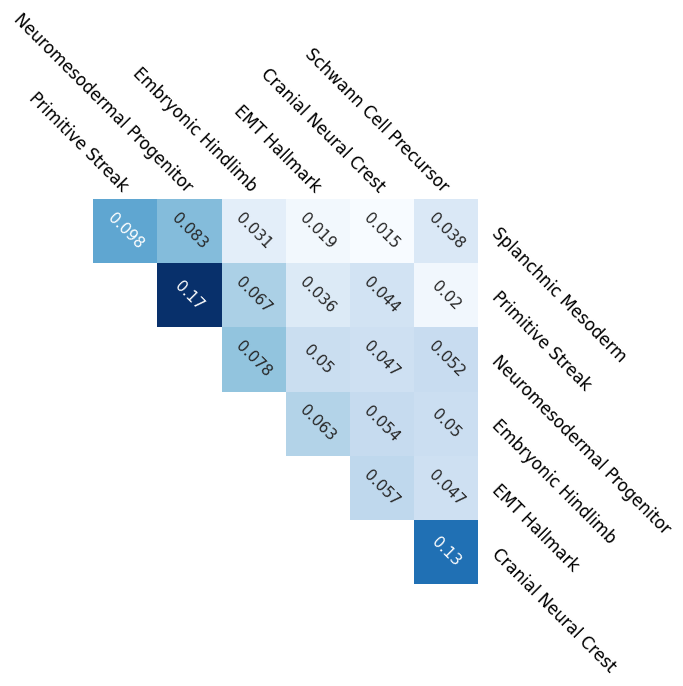

In [6]:
fs1, fs2, rot = 12, 11, -45
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sns.heatmap(
    jac, mask = (np.triu(jac) == 0),
    cmap = 'Blues', annot = True,
    square = True, cbar = False,
    annot_kws = {'fontsize' : fs2,
                 'rotation' : rot},
    ax = ax)

ax.set_yticklabels(ax.get_yticklabels(),
                   size = fs1, rotation = rot)
ax.set_xticklabels(ax.get_xticklabels(),
                   size = fs1, rotation = rot,
                   rotation_mode = 'anchor',
                   ha = 'right', va = 'center')
ax.tick_params('y', labelright = True,
               left = False,
               labelleft = False)
ax.tick_params('x', labeltop = True,
               bottom = False,
               labelbottom = False)
fn = os.path.join(pth_out, 'similarities.pdf')
plt.savefig(fn, bbox_inches = 'tight')